# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups.',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '10 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 50,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 80468
Process ID: 96637
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups.',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '10 epochs',
                         'handcrafted_2']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f4d4f5

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


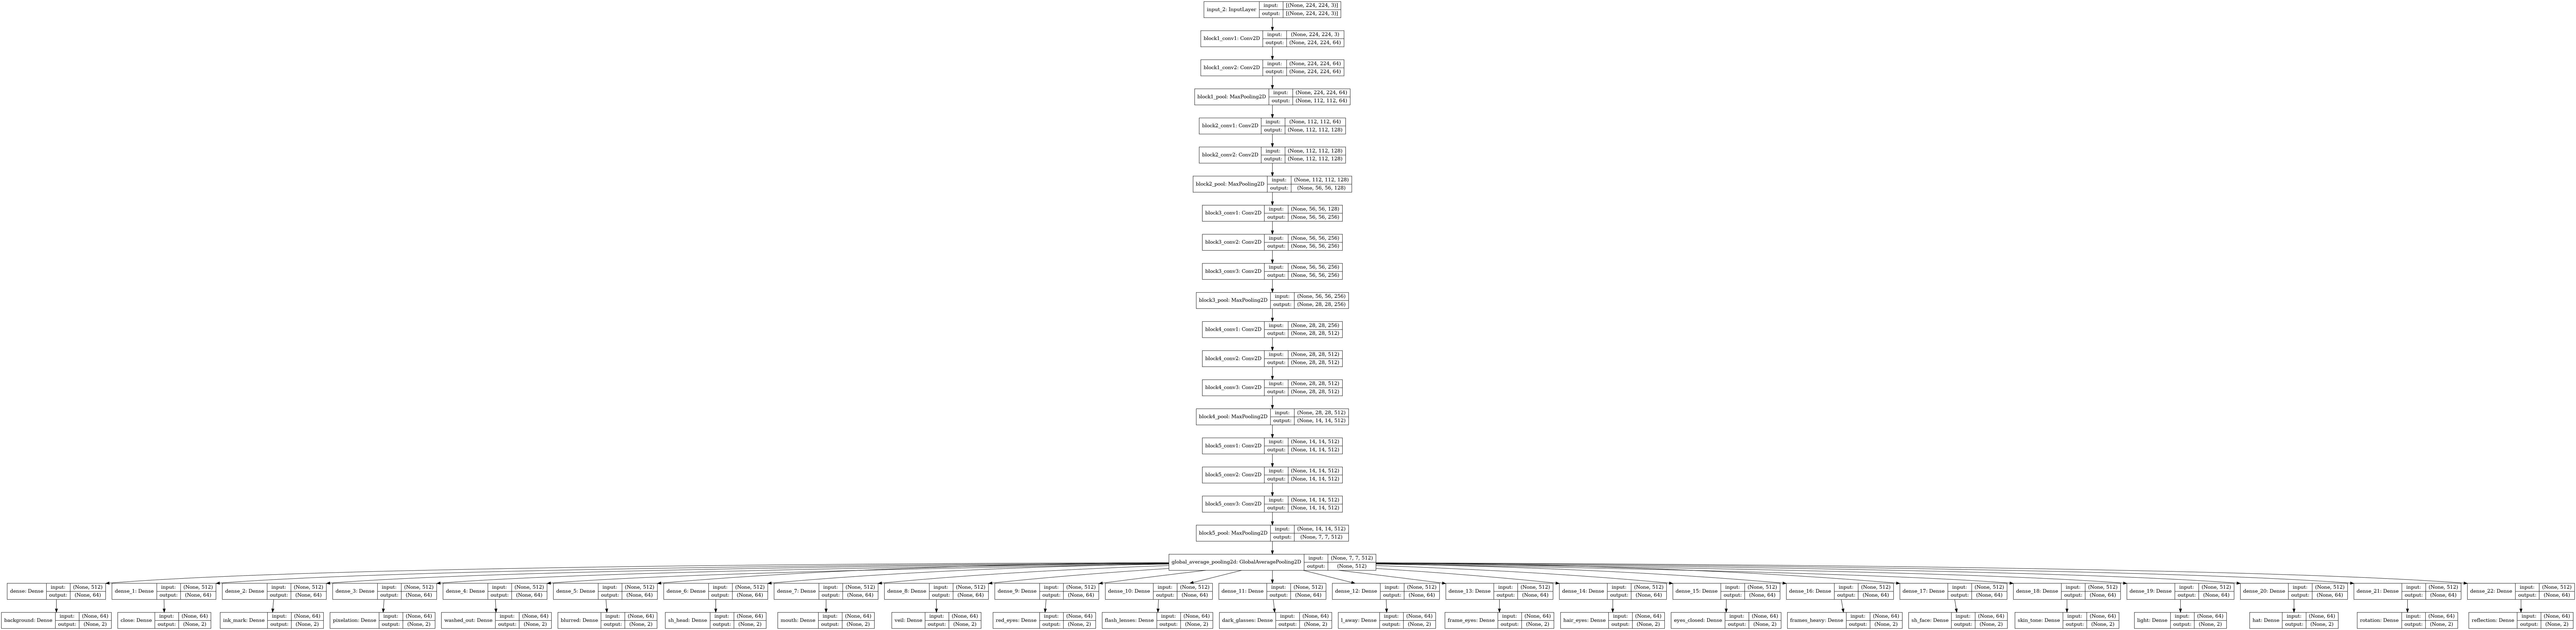

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/50


154/154 [==============================] - 352s 2s/step - loss: 1.1821 - background_loss: 0.6815 - close_loss: 0.6324 - ink_mark_loss: 0.7450 - pixelation_loss: 0.5529 - washed_out_loss: 0.0955 - blurred_loss: 0.4562 - sh_head_loss: 0.5483 - mouth_loss: 0.0434 - veil_loss: 0.6881 - red_eyes_loss: 0.7424 - flash_lenses_loss: 0.3024 - dark_glasses_loss: 0.7115 - l_away_loss: 0.5987 - frame_eyes_loss: 0.7154 - hair_eyes_loss: 0.7029 - eyes_closed_loss: 0.3963 - frames_heavy_loss: 0.1411 - sh_face_loss: 0.7602 - skin_tone_loss: 0.0790 - light_loss: 0.3052 - hat_loss: 0.5482 - rotation_loss: 0.7841 - reflection_loss: 0.5900 - background_accuracy: 0.7173 - close_accuracy: 0.7435 - ink_mark_accuracy: 0.6763 - pixelation_accuracy: 0.7806 - washed_out_accuracy: 0.9815 - blurred_accuracy: 0.8575 - sh_head_accuracy: 0.8622 - mouth_accuracy: 0.9886 - veil_accuracy: 0.7027 - red_eyes_accuracy: 0.7754 - flash_lenses_accuracy: 0.9282 - dark_glasses_accuracy: 0.5392 - l_away_accuracy: 0.8862 - frame_e

# Plots

-------------------- draw training history -------------------


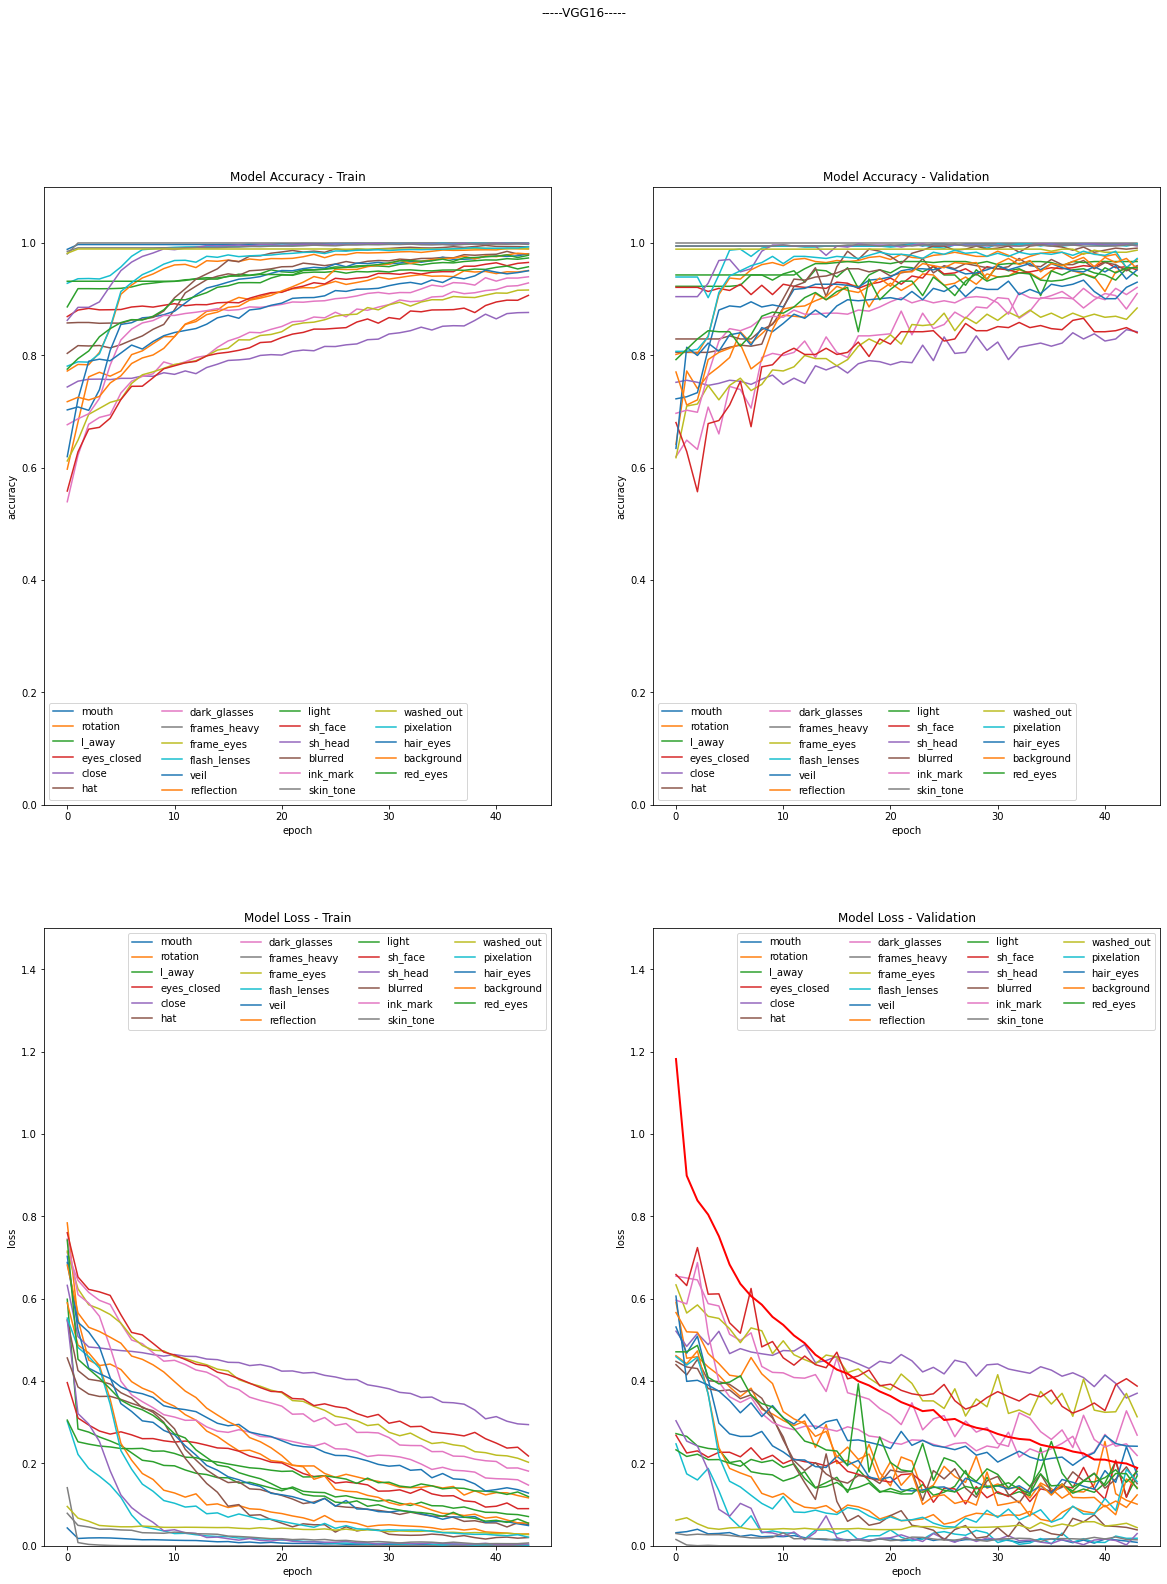

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!
Requisite: MOUTH


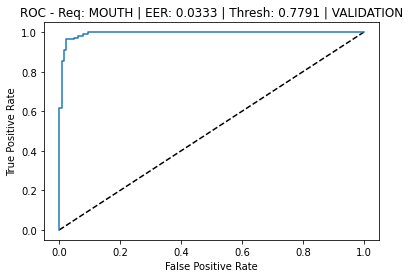

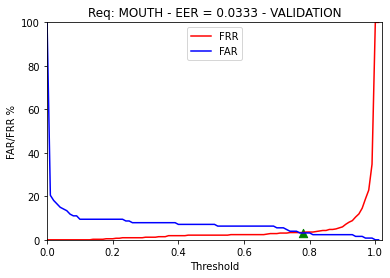

Requisite: MOUTH - EER_interp: 3.3300000000000005% - Best Threshold: 0.7790770759195823
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.97      0.93       127
    COMPLIANT       0.99      0.97      0.98       420

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.96       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 3.15% | FRR: 3.3300000000000005% | EER_mean: 3.2399999999999998% | TP: 406 | TN: 123 | FP: 4 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 96.71%
---------------------------------------------------------
Requisite: ROTATION


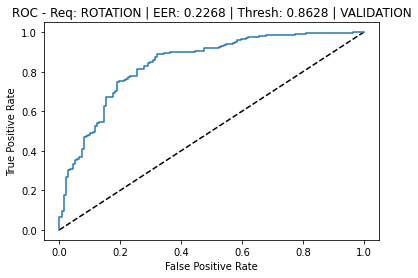

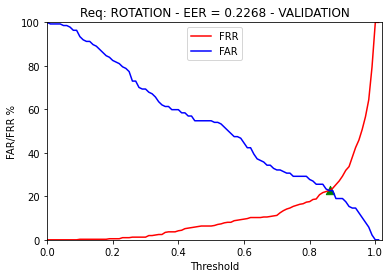

Requisite: ROTATION - EER_interp: 22.68% - Best Threshold: 0.8628110261952004
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.77      0.63       137
    COMPLIANT       0.91      0.77      0.84       410

     accuracy                           0.77       547
    macro avg       0.72      0.77      0.73       547
 weighted avg       0.82      0.77      0.78       547

Confusion matrix ----------------------------------------
FAR: 22.63% | FRR: 22.68% | EER_mean: 22.66% | TP: 317 | TN: 106 | FP: 31 | FN: 93
Accuracy ------------------------------------------------
Model Accuracy: 77.33%
---------------------------------------------------------
Requisite: L_AWAY


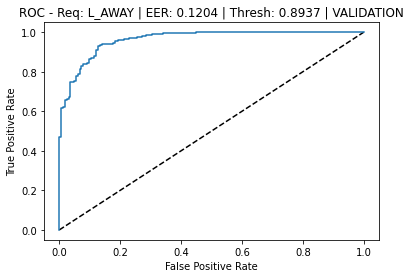

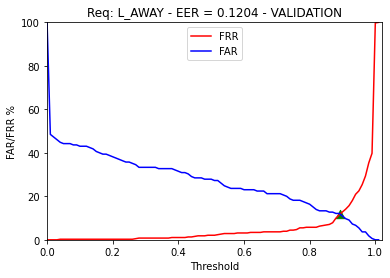

Requisite: L_AWAY - EER_interp: 12.04% - Best Threshold: 0.8937047005323935
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.76      0.88      0.82       165
    COMPLIANT       0.95      0.88      0.91       382

     accuracy                           0.88       547
    macro avg       0.85      0.88      0.86       547
 weighted avg       0.89      0.88      0.88       547

Confusion matrix ----------------------------------------
FAR: 11.52% | FRR: 12.04% | EER_mean: 11.78% | TP: 336 | TN: 146 | FP: 19 | FN: 46
Accuracy ------------------------------------------------
Model Accuracy: 88.12%
---------------------------------------------------------
Requisite: EYES_CLOSED


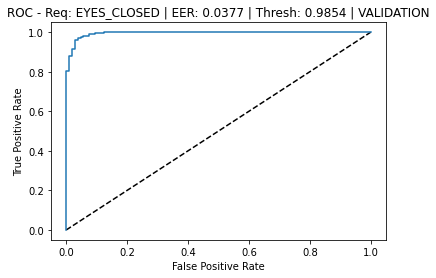

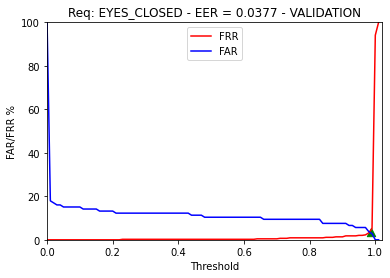

Requisite: EYES_CLOSED - EER_interp: 3.7699999999999996% - Best Threshold: 0.9854491353035131
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.96      0.90       106
    COMPLIANT       0.99      0.96      0.97       441

     accuracy                           0.96       547
    macro avg       0.92      0.96      0.94       547
 weighted avg       0.96      0.96      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.7699999999999996% | FRR: 4.08% | EER_mean: 3.92% | TP: 423 | TN: 102 | FP: 4 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 95.98%
---------------------------------------------------------
Requisite: CLOSE


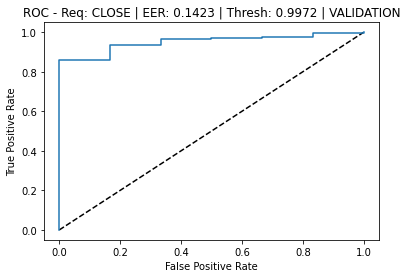

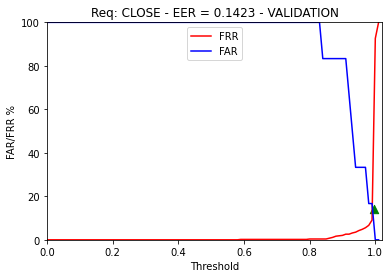

Requisite: CLOSE - EER_interp: 14.23% - Best Threshold: 0.9971796008663565
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      1.00      0.13         6
    COMPLIANT       1.00      0.86      0.92       541

     accuracy                           0.86       547
    macro avg       0.54      0.93      0.53       547
 weighted avg       0.99      0.86      0.91       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 14.23% | EER_mean: 7.12% | TP: 464 | TN: 6 | FP: 0 | FN: 77
Accuracy ------------------------------------------------
Model Accuracy: 85.92%
---------------------------------------------------------
Requisite: HAT


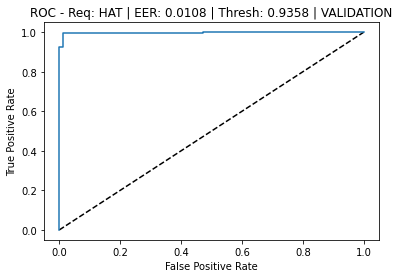

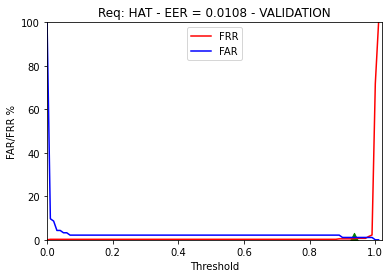

Requisite: HAT - EER_interp: 1.08% - Best Threshold: 0.9357610940903726
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      0.99      0.98        93
    COMPLIANT       1.00      1.00      1.00       454

     accuracy                           0.99       547
    macro avg       0.99      0.99      0.99       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 1.08% | FRR: 0.44% | EER_mean: 0.76% | TP: 452 | TN: 92 | FP: 1 | FN: 2
Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Requisite: DARK_GLASSES


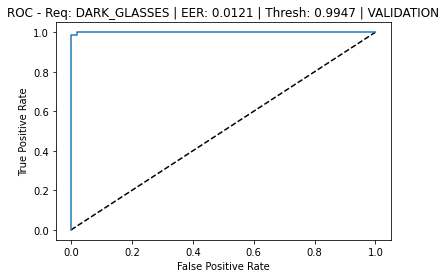

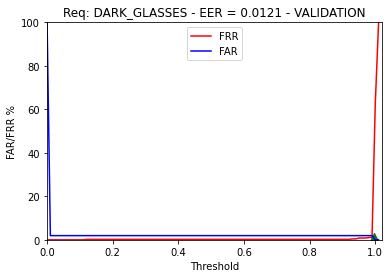

Requisite: DARK_GLASSES - EER_interp: 1.21% - Best Threshold: 0.9946951775839871
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      1.00      0.95        52
    COMPLIANT       1.00      0.99      0.99       495

     accuracy                           0.99       547
    macro avg       0.95      0.99      0.97       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.21% | EER_mean: 0.6% | TP: 489 | TN: 52 | FP: 0 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 98.9%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


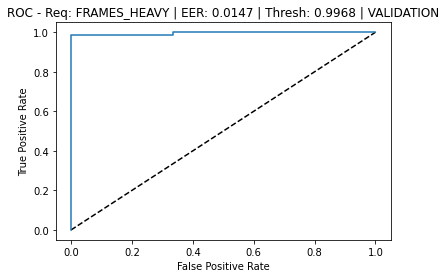

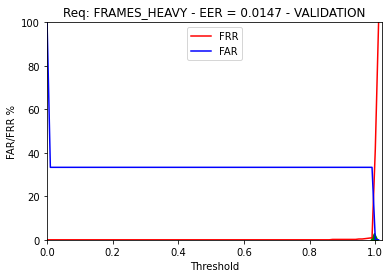

Requisite: FRAMES_HEAVY - EER_interp: 1.47% - Best Threshold: 0.9968105274088244
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.27      1.00      0.43         3
    COMPLIANT       1.00      0.99      0.99       544

     accuracy                           0.99       547
    macro avg       0.64      0.99      0.71       547
 weighted avg       1.00      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.47% | EER_mean: 0.74% | TP: 536 | TN: 3 | FP: 0 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 98.54%
---------------------------------------------------------
Requisite: FRAME_EYES


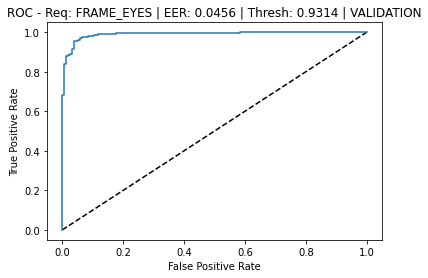

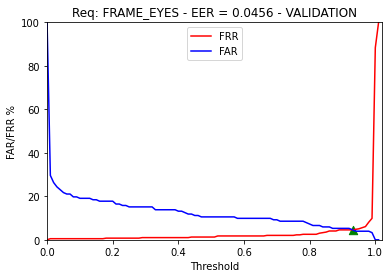

Requisite: FRAME_EYES - EER_interp: 4.5600000000000005% - Best Threshold: 0.9314156378371806
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.95      0.92       152
    COMPLIANT       0.98      0.95      0.97       395

     accuracy                           0.95       547
    macro avg       0.94      0.95      0.94       547
 weighted avg       0.96      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.61% | FRR: 4.5600000000000005% | EER_mean: 4.58% | TP: 377 | TN: 145 | FP: 7 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 95.43%
---------------------------------------------------------
Requisite: FLASH_LENSES


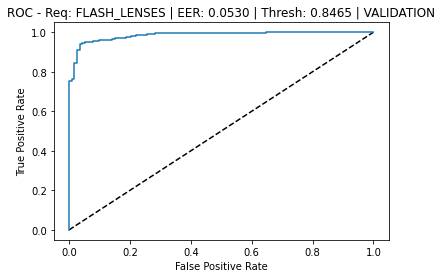

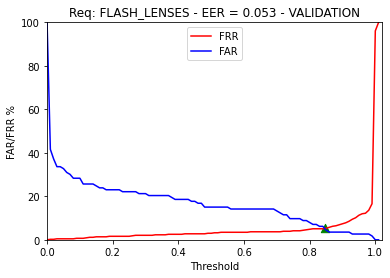

Requisite: FLASH_LENSES - EER_interp: 5.3% - Best Threshold: 0.8464568993462944
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.96      0.89       113
    COMPLIANT       0.99      0.95      0.97       434

     accuracy                           0.95       547
    macro avg       0.91      0.95      0.93       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 4.42% | FRR: 5.3% | EER_mean: 4.859999999999999% | TP: 411 | TN: 108 | FP: 5 | FN: 23
Accuracy ------------------------------------------------
Model Accuracy: 94.88%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


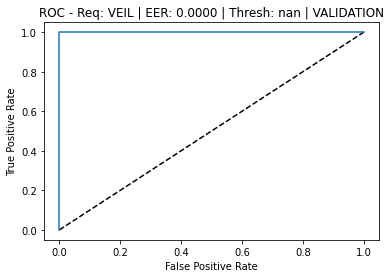

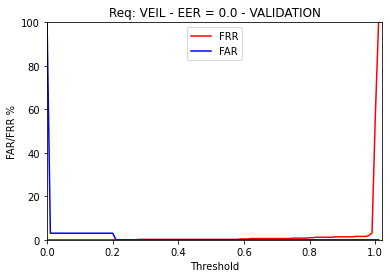

Requisite: VEIL - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        33
    COMPLIANT       0.94      1.00      0.97       514

     accuracy                           0.94       547
    macro avg       0.47      0.50      0.48       547
 weighted avg       0.88      0.94      0.91       547

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 514 | TN: 0 | FP: 33 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 93.97%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


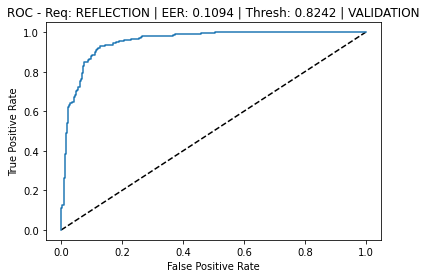

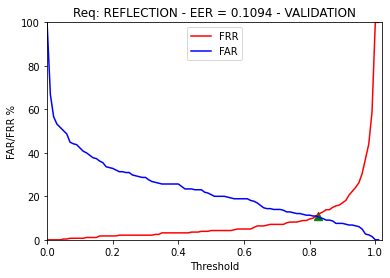

Requisite: REFLECTION - EER_interp: 10.94% - Best Threshold: 0.824228763580466
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.89      0.89       265
    COMPLIANT       0.90      0.89      0.89       282

     accuracy                           0.89       547
    macro avg       0.89      0.89      0.89       547
 weighted avg       0.89      0.89      0.89       547

Confusion matrix ----------------------------------------
FAR: 10.94% | FRR: 11.35% | EER_mean: 11.14% | TP: 250 | TN: 236 | FP: 29 | FN: 32
Accuracy ------------------------------------------------
Model Accuracy: 88.85%
---------------------------------------------------------
Requisite: LIGHT


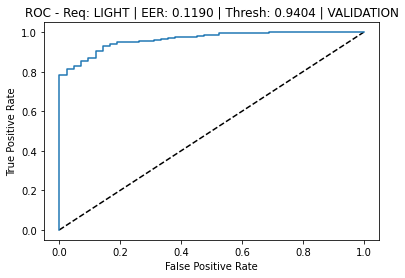

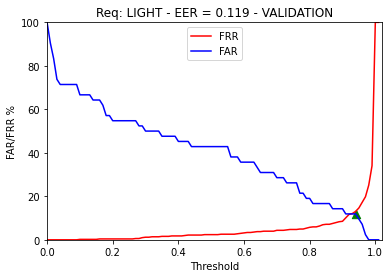

Requisite: LIGHT - EER_interp: 11.899999999999999% - Best Threshold: 0.9403632283210864
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      0.88      0.51        42
    COMPLIANT       0.99      0.87      0.93       505

     accuracy                           0.87       547
    macro avg       0.67      0.88      0.72       547
 weighted avg       0.94      0.87      0.89       547

Confusion matrix ----------------------------------------
FAR: 11.899999999999999% | FRR: 13.07% | EER_mean: 12.479999999999999% | TP: 439 | TN: 37 | FP: 5 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 87.02%
---------------------------------------------------------
Requisite: SH_FACE


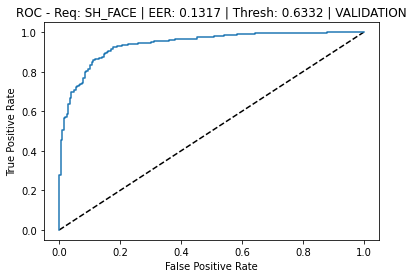

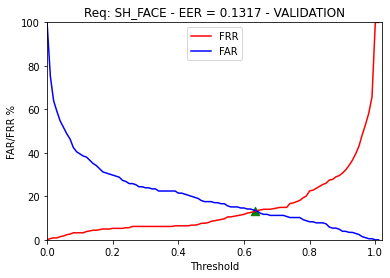

Requisite: SH_FACE - EER_interp: 13.170000000000002% - Best Threshold: 0.6331605911254807
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.80      0.87      0.83       205
    COMPLIANT       0.92      0.87      0.89       342

     accuracy                           0.87       547
    macro avg       0.86      0.87      0.86       547
 weighted avg       0.87      0.87      0.87       547

Confusion matrix ----------------------------------------
FAR: 13.170000000000002% | FRR: 13.16% | EER_mean: 13.16% | TP: 297 | TN: 178 | FP: 27 | FN: 45
Accuracy ------------------------------------------------
Model Accuracy: 86.83999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


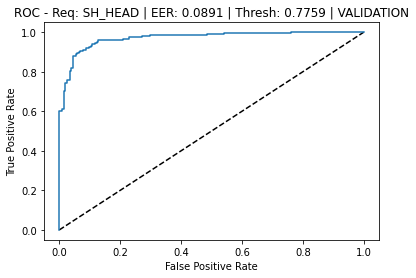

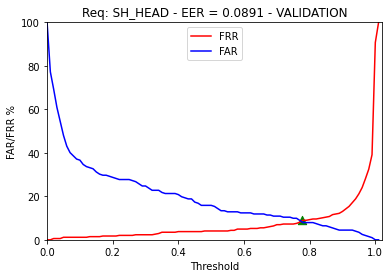

Requisite: SH_HEAD - EER_interp: 8.91% - Best Threshold: 0.7759368419647655
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.91      0.88       202
    COMPLIANT       0.95      0.91      0.93       345

     accuracy                           0.91       547
    macro avg       0.90      0.91      0.91       547
 weighted avg       0.91      0.91      0.91       547

Confusion matrix ----------------------------------------
FAR: 8.91% | FRR: 8.99% | EER_mean: 8.95% | TP: 314 | TN: 184 | FP: 18 | FN: 31
Accuracy ------------------------------------------------
Model Accuracy: 91.03999999999999%
---------------------------------------------------------
Requisite: BLURRED


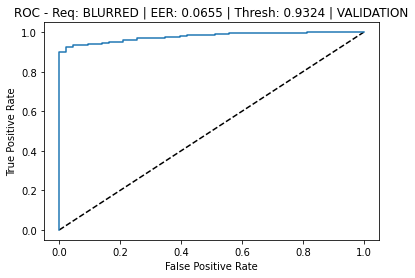

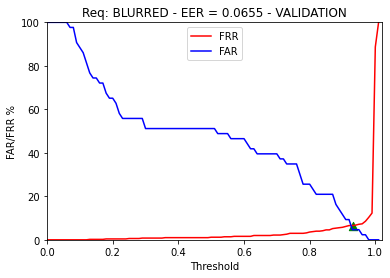

Requisite: BLURRED - EER_interp: 6.550000000000001% - Best Threshold: 0.9324222730382545
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.55      0.95      0.70        43
    COMPLIANT       1.00      0.93      0.96       504

     accuracy                           0.94       547
    macro avg       0.77      0.94      0.83       547
 weighted avg       0.96      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 4.65% | FRR: 6.550000000000001% | EER_mean: 5.6000000000000005% | TP: 471 | TN: 41 | FP: 2 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 93.60000000000001%
---------------------------------------------------------
Requisite: SKIN_TONE


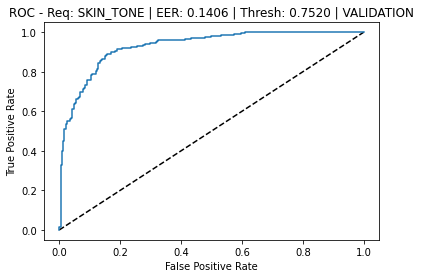

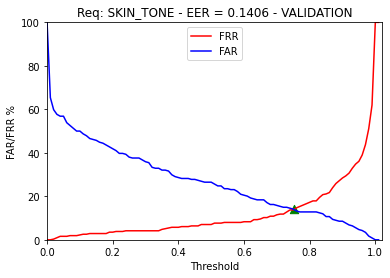

Requisite: SKIN_TONE - EER_interp: 14.06% - Best Threshold: 0.7519597285471785
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.86      0.84       234
    COMPLIANT       0.89      0.86      0.88       313

     accuracy                           0.86       547
    macro avg       0.86      0.86      0.86       547
 weighted avg       0.86      0.86      0.86       547

Confusion matrix ----------------------------------------
FAR: 13.68% | FRR: 14.06% | EER_mean: 13.87% | TP: 269 | TN: 202 | FP: 32 | FN: 44
Accuracy ------------------------------------------------
Model Accuracy: 86.11%
---------------------------------------------------------
Requisite: WASHED_OUT


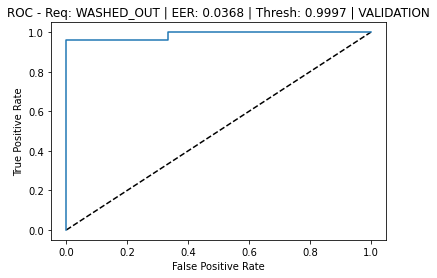

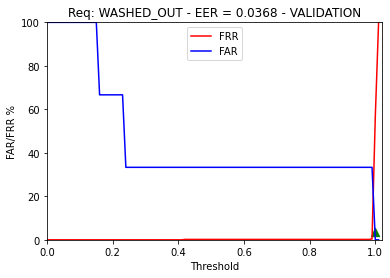

Requisite: WASHED_OUT - EER_interp: 3.6799999999999997% - Best Threshold: 0.9997141738148296
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.13      1.00      0.23         3
    COMPLIANT       1.00      0.96      0.98       544

     accuracy                           0.96       547
    macro avg       0.57      0.98      0.61       547
 weighted avg       1.00      0.96      0.98       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 3.6799999999999997% | EER_mean: 1.8399999999999999% | TP: 524 | TN: 3 | FP: 0 | FN: 20
Accuracy ------------------------------------------------
Model Accuracy: 96.34%
---------------------------------------------------------
Requisite: PIXELATION


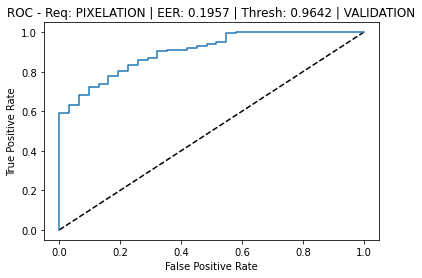

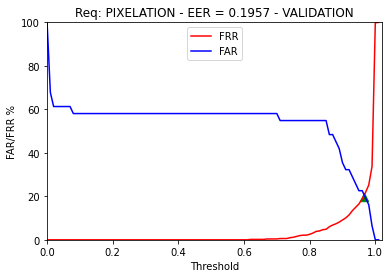

Requisite: PIXELATION - EER_interp: 19.57% - Best Threshold: 0.9641875794460607
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.20      0.81      0.32        31
    COMPLIANT       0.99      0.80      0.89       516

     accuracy                           0.80       547
    macro avg       0.59      0.81      0.60       547
 weighted avg       0.94      0.80      0.85       547

Confusion matrix ----------------------------------------
FAR: 19.35% | FRR: 19.57% | EER_mean: 19.46% | TP: 415 | TN: 25 | FP: 6 | FN: 101
Accuracy ------------------------------------------------
Model Accuracy: 80.44%
---------------------------------------------------------
Requisite: HAIR_EYES


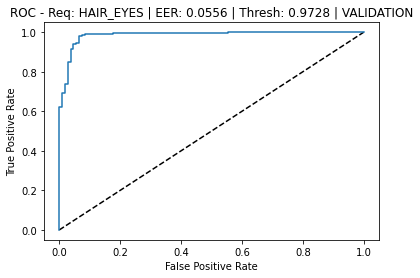

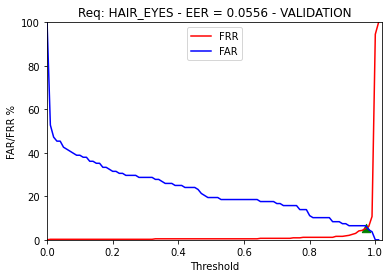

Requisite: HAIR_EYES - EER_interp: 5.56% - Best Threshold: 0.9728261828422343
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.81      0.94      0.87       108
    COMPLIANT       0.99      0.95      0.97       439

     accuracy                           0.95       547
    macro avg       0.90      0.94      0.92       547
 weighted avg       0.95      0.95      0.95       547

Confusion matrix ----------------------------------------
FAR: 5.56% | FRR: 5.47% | EER_mean: 5.52% | TP: 415 | TN: 102 | FP: 6 | FN: 24
Accuracy ------------------------------------------------
Model Accuracy: 94.52000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


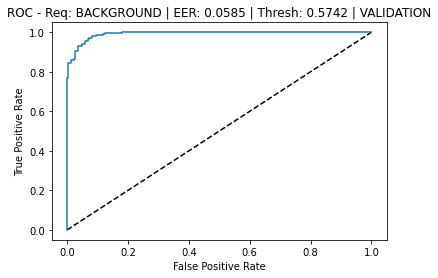

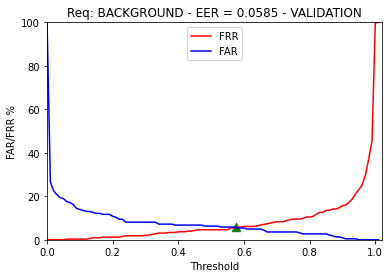

Requisite: BACKGROUND - EER_interp: 5.8500000000000005% - Best Threshold: 0.574213699927698
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.95      0.93       222
    COMPLIANT       0.96      0.94      0.95       325

     accuracy                           0.94       547
    macro avg       0.94      0.94      0.94       547
 weighted avg       0.94      0.94      0.94       547

Confusion matrix ----------------------------------------
FAR: 5.41% | FRR: 5.8500000000000005% | EER_mean: 5.63% | TP: 306 | TN: 210 | FP: 12 | FN: 19
Accuracy ------------------------------------------------
Model Accuracy: 94.33%
---------------------------------------------------------
Requisite: RED_EYES


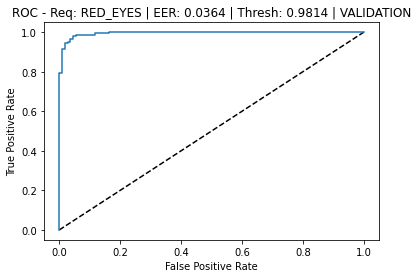

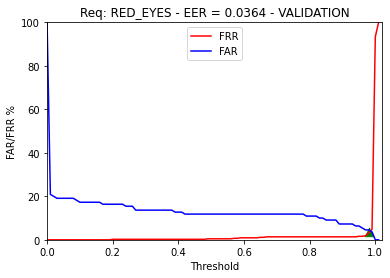

Requisite: RED_EYES - EER_interp: 3.64% - Best Threshold: 0.9813587069509919
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.96      0.92       110
    COMPLIANT       0.99      0.97      0.98       437

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.95       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 3.64% | FRR: 3.2% | EER_mean: 3.42% | TP: 423 | TN: 106 | FP: 4 | FN: 14
Accuracy ------------------------------------------------
Model Accuracy: 96.71%
---------------------------------------------------------


In [16]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 21s 3s/step
Prediction finished!
Requisite: MOUTH


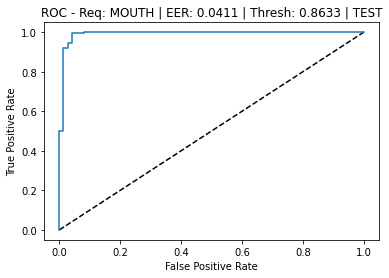

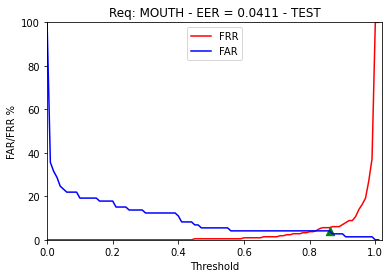

Requisite: MOUTH - EER_interp: 4.109999999999999% - Best Threshold: 0.8633113503459616
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.96      0.90        73
    COMPLIANT       0.99      0.94      0.96       215

     accuracy                           0.95       288
    macro avg       0.92      0.95      0.93       288
 weighted avg       0.95      0.95      0.95       288

Confusion matrix ----------------------------------------
FAR: 4.109999999999999% | FRR: 5.58% | EER_mean: 4.84% | TP: 203 | TN: 70 | FP: 3 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 94.78999999999999%
---------------------------------------------------------
Requisite: ROTATION


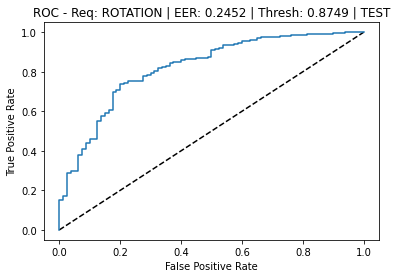

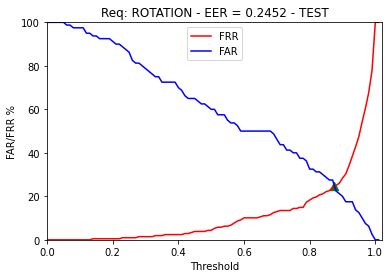

Requisite: ROTATION - EER_interp: 24.52% - Best Threshold: 0.8749402211262629
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.54      0.74      0.62        80
    COMPLIANT       0.88      0.75      0.81       208

     accuracy                           0.75       288
    macro avg       0.71      0.75      0.72       288
 weighted avg       0.79      0.75      0.76       288

Confusion matrix ----------------------------------------
FAR: 26.25% | FRR: 24.52% | EER_mean: 25.380000000000003% | TP: 157 | TN: 59 | FP: 21 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 75.0%
---------------------------------------------------------
Requisite: L_AWAY


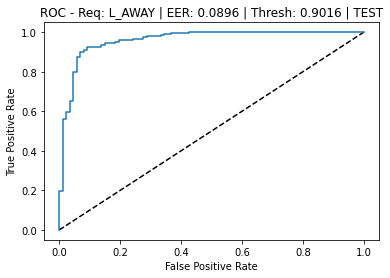

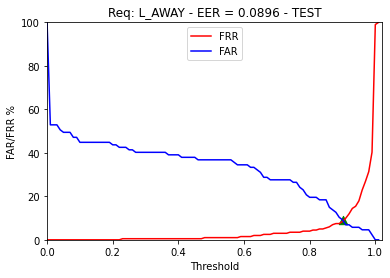

Requisite: L_AWAY - EER_interp: 8.959999999999999% - Best Threshold: 0.901640884911836
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.82      0.92      0.86        87
    COMPLIANT       0.96      0.91      0.94       201

     accuracy                           0.91       288
    macro avg       0.89      0.91      0.90       288
 weighted avg       0.92      0.91      0.91       288

Confusion matrix ----------------------------------------
FAR: 8.05% | FRR: 8.959999999999999% | EER_mean: 8.5% | TP: 183 | TN: 80 | FP: 7 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 91.32000000000001%
---------------------------------------------------------
Requisite: EYES_CLOSED


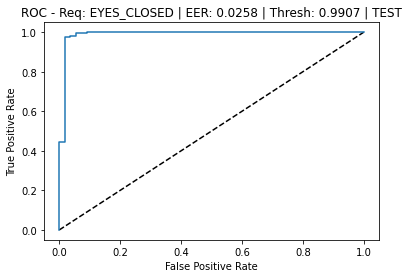

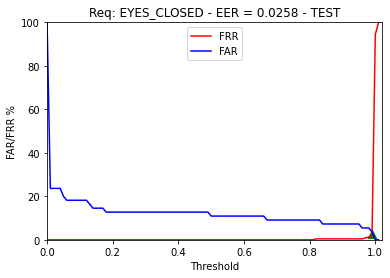

Requisite: EYES_CLOSED - EER_interp: 2.58% - Best Threshold: 0.9907112883907532
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.98      0.94        55
    COMPLIANT       1.00      0.97      0.98       233

     accuracy                           0.98       288
    macro avg       0.95      0.98      0.96       288
 weighted avg       0.98      0.98      0.98       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 2.58% | EER_mean: 2.1999999999999997% | TP: 227 | TN: 54 | FP: 1 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 97.57000000000001%
---------------------------------------------------------
Requisite: CLOSE


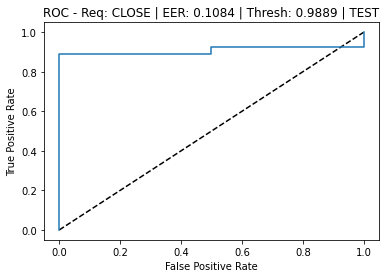

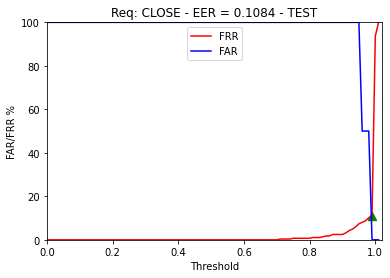

Requisite: CLOSE - EER_interp: 10.84% - Best Threshold: 0.9888965237390744
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      1.00      0.11         2
    COMPLIANT       1.00      0.89      0.94       286

     accuracy                           0.89       288
    macro avg       0.53      0.95      0.53       288
 weighted avg       0.99      0.89      0.94       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 10.84% | EER_mean: 5.42% | TP: 255 | TN: 2 | FP: 0 | FN: 31
Accuracy ------------------------------------------------
Model Accuracy: 89.24%
---------------------------------------------------------
Requisite: HAT


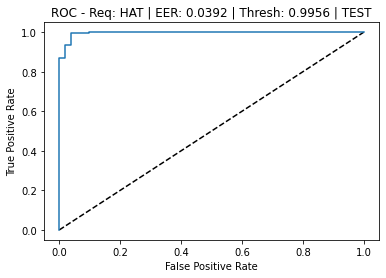

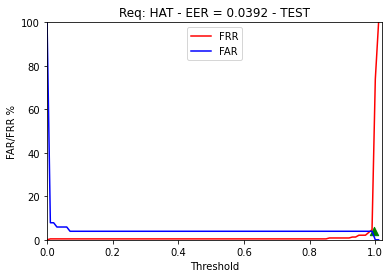

Requisite: HAT - EER_interp: 3.92% - Best Threshold: 0.995590925216675
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.96      0.85        51
    COMPLIANT       0.99      0.94      0.96       237

     accuracy                           0.94       288
    macro avg       0.88      0.95      0.91       288
 weighted avg       0.95      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 3.92% | FRR: 6.329999999999999% | EER_mean: 5.12% | TP: 222 | TN: 49 | FP: 2 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 94.1%
---------------------------------------------------------
Requisite: DARK_GLASSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


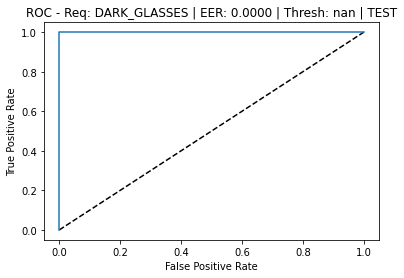

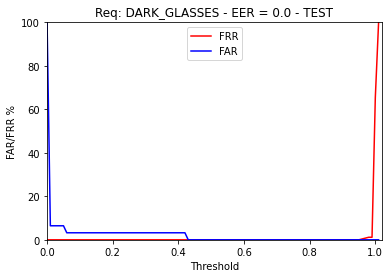

Requisite: DARK_GLASSES - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        31
    COMPLIANT       0.89      1.00      0.94       257

     accuracy                           0.89       288
    macro avg       0.45      0.50      0.47       288
 weighted avg       0.80      0.89      0.84       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 257 | TN: 0 | FP: 31 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 89.24%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


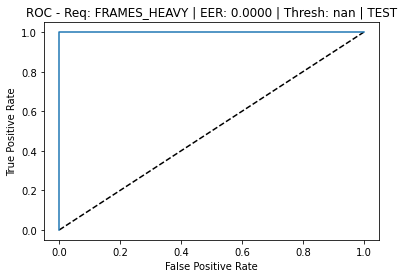

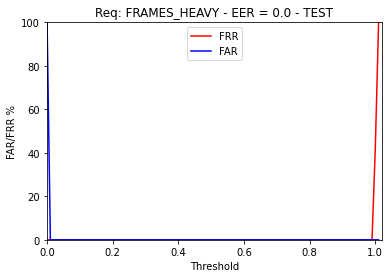

Requisite: FRAMES_HEAVY - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         2
    COMPLIANT       0.99      1.00      1.00       286

     accuracy                           0.99       288
    macro avg       0.50      0.50      0.50       288
 weighted avg       0.99      0.99      0.99       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 286 | TN: 0 | FP: 2 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------
Requisite: FRAME_EYES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


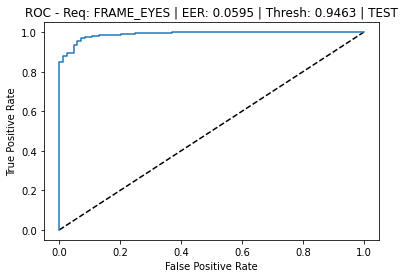

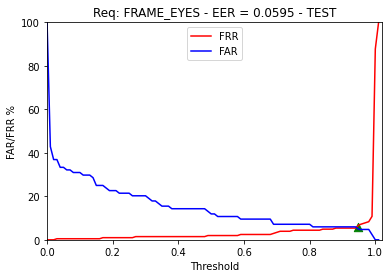

Requisite: FRAME_EYES - EER_interp: 5.949999999999999% - Best Threshold: 0.946264922618916
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.94      0.90        84
    COMPLIANT       0.97      0.94      0.96       204

     accuracy                           0.94       288
    macro avg       0.92      0.94      0.93       288
 weighted avg       0.94      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 5.949999999999999% | FRR: 6.370000000000001% | EER_mean: 6.16% | TP: 191 | TN: 79 | FP: 5 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 93.75%
---------------------------------------------------------
Requisite: FLASH_LENSES


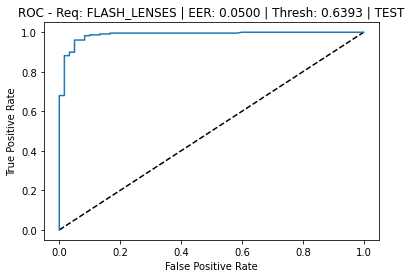

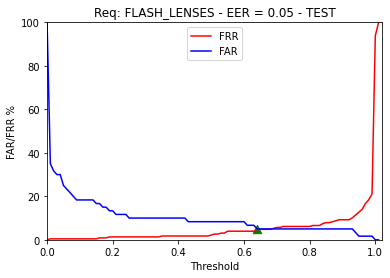

Requisite: FLASH_LENSES - EER_interp: 5.0% - Best Threshold: 0.6393430829045582
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.95      0.90        60
    COMPLIANT       0.99      0.96      0.97       228

     accuracy                           0.96       288
    macro avg       0.93      0.96      0.94       288
 weighted avg       0.96      0.96      0.96       288

Confusion matrix ----------------------------------------
FAR: 5.0% | FRR: 3.95% | EER_mean: 4.4799999999999995% | TP: 219 | TN: 57 | FP: 3 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 95.83%
---------------------------------------------------------
Requisite: VEIL


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


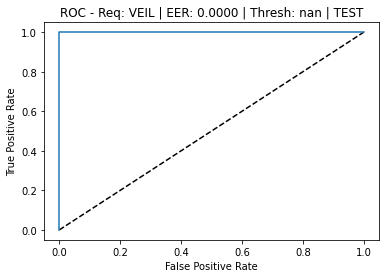

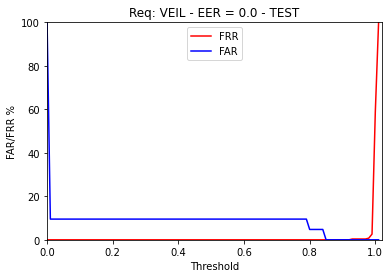

Requisite: VEIL - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00        21
    COMPLIANT       0.93      1.00      0.96       267

     accuracy                           0.93       288
    macro avg       0.46      0.50      0.48       288
 weighted avg       0.86      0.93      0.89       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 267 | TN: 0 | FP: 21 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 92.71000000000001%
---------------------------------------------------------
Requisite: REFLECTION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


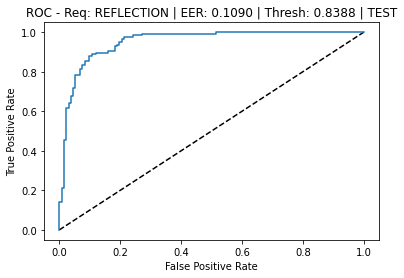

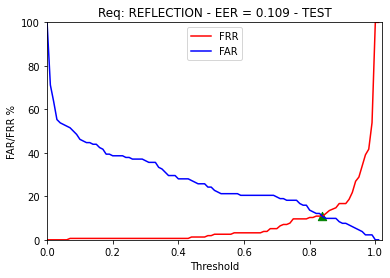

Requisite: REFLECTION - EER_interp: 10.9% - Best Threshold: 0.8388095796108246
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.89      0.88       132
    COMPLIANT       0.91      0.89      0.90       156

     accuracy                           0.89       288
    macro avg       0.89      0.89      0.89       288
 weighted avg       0.89      0.89      0.89       288

Confusion matrix ----------------------------------------
FAR: 10.61% | FRR: 10.9% | EER_mean: 10.76% | TP: 139 | TN: 118 | FP: 14 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 89.24%
---------------------------------------------------------
Requisite: LIGHT


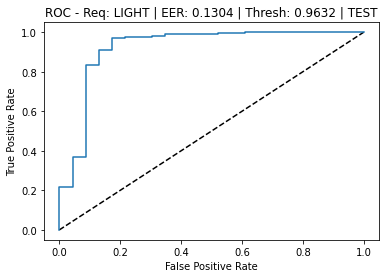

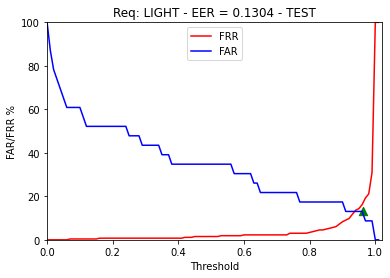

Requisite: LIGHT - EER_interp: 13.04% - Best Threshold: 0.9631938338279727
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.87      0.46        23
    COMPLIANT       0.99      0.83      0.90       265

     accuracy                           0.84       288
    macro avg       0.65      0.85      0.68       288
 weighted avg       0.93      0.84      0.87       288

Confusion matrix ----------------------------------------
FAR: 13.04% | FRR: 16.6% | EER_mean: 14.82% | TP: 221 | TN: 20 | FP: 3 | FN: 44
Accuracy ------------------------------------------------
Model Accuracy: 83.67999999999999%
---------------------------------------------------------
Requisite: SH_FACE


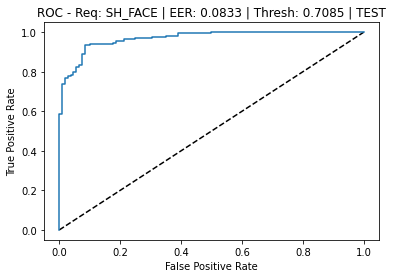

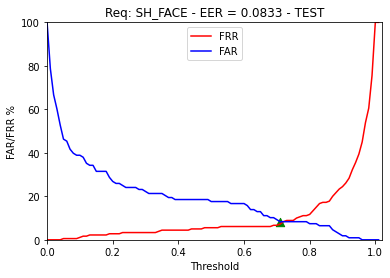

Requisite: SH_FACE - EER_interp: 8.33% - Best Threshold: 0.7085000872611115
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.92      0.90       108
    COMPLIANT       0.95      0.93      0.94       180

     accuracy                           0.93       288
    macro avg       0.92      0.93      0.92       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 8.33% | FRR: 6.67% | EER_mean: 7.5% | TP: 168 | TN: 99 | FP: 9 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 92.71000000000001%
---------------------------------------------------------
Requisite: SH_HEAD


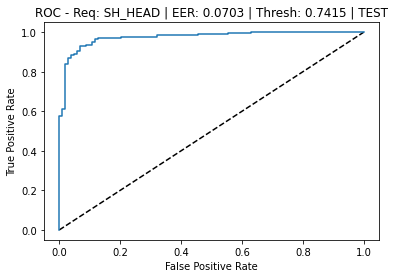

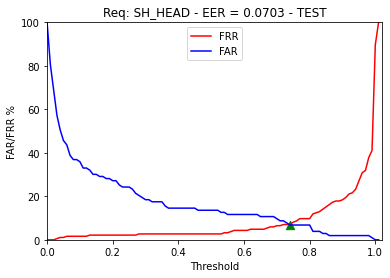

Requisite: SH_HEAD - EER_interp: 7.03% - Best Threshold: 0.7414680490621954
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.88      0.93      0.91       103
    COMPLIANT       0.96      0.93      0.95       185

     accuracy                           0.93       288
    macro avg       0.92      0.93      0.93       288
 weighted avg       0.93      0.93      0.93       288

Confusion matrix ----------------------------------------
FAR: 6.800000000000001% | FRR: 7.03% | EER_mean: 6.92% | TP: 172 | TN: 96 | FP: 7 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 93.06%
---------------------------------------------------------
Requisite: BLURRED


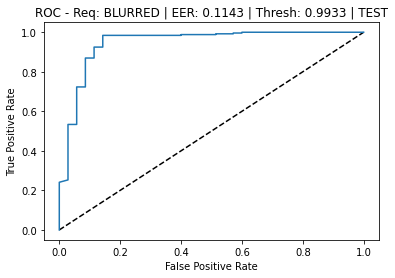

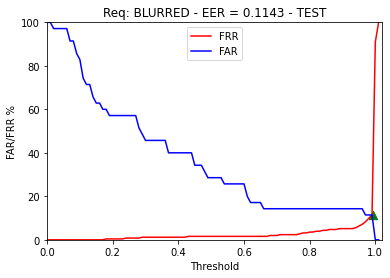

Requisite: BLURRED - EER_interp: 11.43% - Best Threshold: 0.9932994842529497
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.89      0.63        35
    COMPLIANT       0.98      0.87      0.92       253

     accuracy                           0.87       288
    macro avg       0.73      0.88      0.77       288
 weighted avg       0.92      0.87      0.89       288

Confusion matrix ----------------------------------------
FAR: 11.43% | FRR: 13.04% | EER_mean: 12.23% | TP: 220 | TN: 31 | FP: 4 | FN: 33
Accuracy ------------------------------------------------
Model Accuracy: 87.15%
---------------------------------------------------------
Requisite: SKIN_TONE


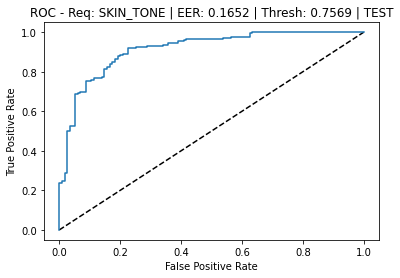

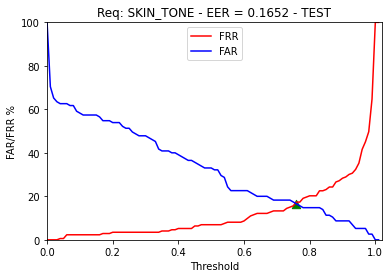

Requisite: SKIN_TONE - EER_interp: 16.520000000000003% - Best Threshold: 0.7569316625588169
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.83      0.80       115
    COMPLIANT       0.88      0.84      0.86       173

     accuracy                           0.84       288
    macro avg       0.83      0.84      0.83       288
 weighted avg       0.84      0.84      0.84       288

Confusion matrix ----------------------------------------
FAR: 16.520000000000003% | FRR: 16.18% | EER_mean: 16.35% | TP: 145 | TN: 96 | FP: 19 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 83.67999999999999%
---------------------------------------------------------
Requisite: WASHED_OUT


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


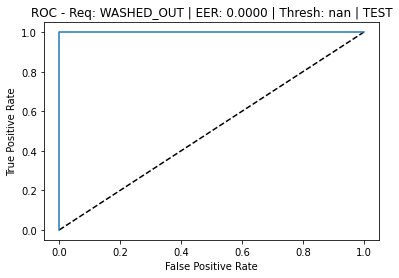

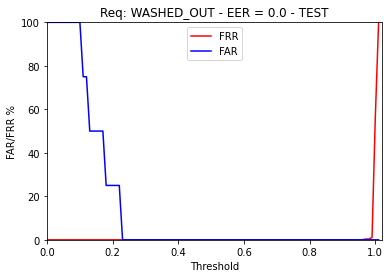

Requisite: WASHED_OUT - EER_interp: 0.0% - Best Threshold: nan
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         4
    COMPLIANT       0.99      1.00      0.99       284

     accuracy                           0.99       288
    macro avg       0.49      0.50      0.50       288
 weighted avg       0.97      0.99      0.98       288

Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | EER_mean: 50.0% | TP: 284 | TN: 0 | FP: 4 | FN: 0
Accuracy ------------------------------------------------
Model Accuracy: 98.61%
---------------------------------------------------------
Requisite: PIXELATION


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


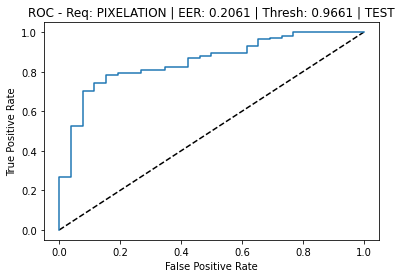

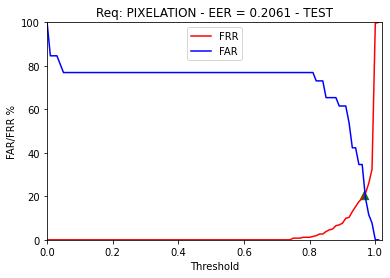

Requisite: PIXELATION - EER_interp: 20.61% - Best Threshold: 0.9661429326497871
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      0.81      0.42        26
    COMPLIANT       0.98      0.79      0.88       262

     accuracy                           0.80       288
    macro avg       0.63      0.80      0.65       288
 weighted avg       0.91      0.80      0.83       288

Confusion matrix ----------------------------------------
FAR: 19.23% | FRR: 20.61% | EER_mean: 19.919999999999998% | TP: 208 | TN: 21 | FP: 5 | FN: 54
Accuracy ------------------------------------------------
Model Accuracy: 79.51%
---------------------------------------------------------
Requisite: HAIR_EYES


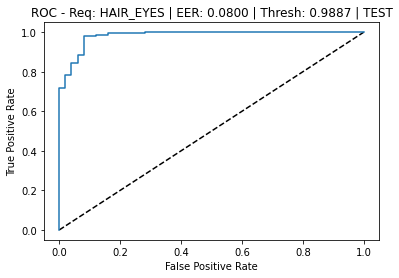

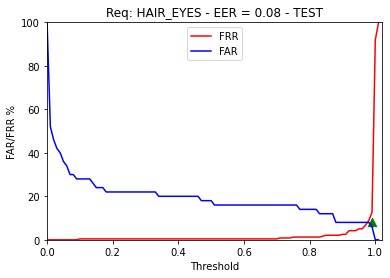

Requisite: HAIR_EYES - EER_interp: 8.0% - Best Threshold: 0.9887109398842022
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.62      0.92      0.74        50
    COMPLIANT       0.98      0.88      0.93       238

     accuracy                           0.89       288
    macro avg       0.80      0.90      0.84       288
 weighted avg       0.92      0.89      0.90       288

Confusion matrix ----------------------------------------
FAR: 8.0% | FRR: 11.76% | EER_mean: 9.879999999999999% | TP: 210 | TN: 46 | FP: 4 | FN: 28
Accuracy ------------------------------------------------
Model Accuracy: 88.89%
---------------------------------------------------------
Requisite: BACKGROUND


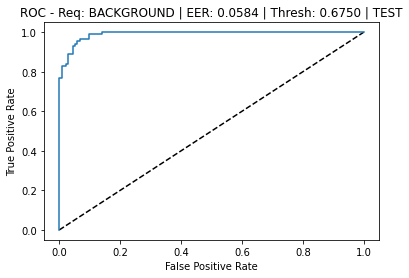

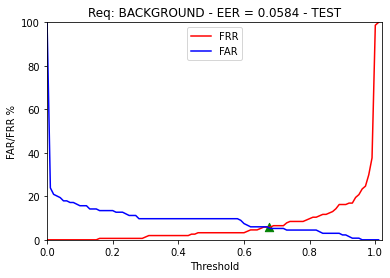

Requisite: BACKGROUND - EER_interp: 5.84% - Best Threshold: 0.6750136962184703
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.93      0.95      0.94       134
    COMPLIANT       0.95      0.94      0.95       154

     accuracy                           0.94       288
    macro avg       0.94      0.94      0.94       288
 weighted avg       0.94      0.94      0.94       288

Confusion matrix ----------------------------------------
FAR: 5.220000000000001% | FRR: 5.84% | EER_mean: 5.53% | TP: 145 | TN: 127 | FP: 7 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 94.44%
---------------------------------------------------------
Requisite: RED_EYES


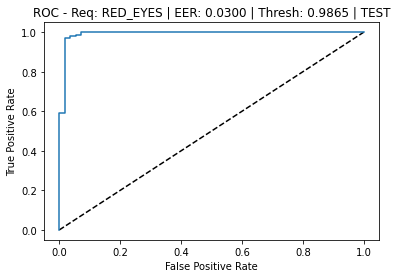

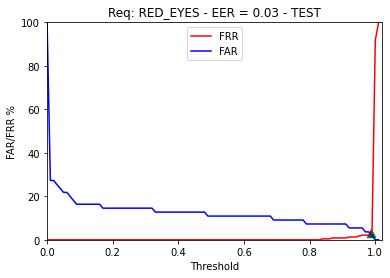

Requisite: RED_EYES - EER_interp: 3.0% - Best Threshold: 0.98648857533164
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.98      0.93        55
    COMPLIANT       1.00      0.97      0.98       233

     accuracy                           0.97       288
    macro avg       0.94      0.98      0.96       288
 weighted avg       0.97      0.97      0.97       288

Confusion matrix ----------------------------------------
FAR: 1.82% | FRR: 3.0% | EER_mean: 2.41% | TP: 226 | TN: 54 | FP: 1 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 97.22%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
